# Topic Analysis Country #3 - Context 

#### Grace Chen

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label_data = pd.read_csv("new_schema.csv")


In [4]:
article_data = pd.read_json("preliminary_data/gni88.json", lines=True)
# article_data.head()

In [5]:
topic_data = label_data[['Article ID', 'Headline', 'Quote ID','New Message', 'QText']]
# topic_data.head()

In [6]:
article_data = article_data[["Article ID", "Content"]]
# article_data.head()

In [7]:
merged_df = pd.merge(topic_data, article_data, how="inner", on="Article ID")
merged_df.head()

,Article ID,Headline,Quote ID,New Message,QText,Content
0,34716952,"Pakistan, India peace move silences deadly Kas...",58664882,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...
1,34752219,"Iran, major powers in the agreement to keep Te...",58487896,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...
2,34970673,Vandenberg likely to host training unit for ne...,58465753,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...
3,34970673,Vandenberg likely to host training unit for ne...,58465751,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...
4,34970673,Vandenberg likely to host training unit for ne...,58465752,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...


In [8]:
# merged_df["Messages"] = merged_df["Messages"].str.replace("OLD Iran", "Iran")
merged_df["Messages"] = merged_df["New Message"]
merged_df.head()

,Article ID,Headline,Quote ID,New Message,QText,Content,Messages
0,34716952,"Pakistan, India peace move silences deadly Kas...",58664882,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,Other
1,34752219,"Iran, major powers in the agreement to keep Te...",58487896,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,Other
2,34970673,Vandenberg likely to host training unit for ne...,58465753,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,Other
3,34970673,Vandenberg likely to host training unit for ne...,58465751,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,Other
4,34970673,Vandenberg likely to host training unit for ne...,58465752,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,Other


## Find Context of Quote in Text

In [9]:
text_quote_df = merged_df[["Messages", "QText", "Content"]]
text_quote_df.head()

,Messages,QText,Content
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...


In [10]:
import re

In [11]:
def text_to_sentences(text):
    if type(text) == str:
        sentence_pattern = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s"
        sentences = re.split(sentence_pattern, text)
        return sentences
    return []

In [12]:
# text_quote_df = text_quote_df[message_is_country]
text_quote_df["full_sentences"] = text_quote_df["Content"].apply(text_to_sentences)
text_quote_df.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/1654139622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_quote_df["full_sentences"] = text_quote_df["Content"].apply(text_to_sentences)


,Messages,QText,Content,full_sentences
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe..."
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe..."
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe..."


In [13]:
def text_to_phrases(text):
    if type(text) == str:
        sentence_pattern = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!|\;|\,)\s"
        sentences = re.split(sentence_pattern, text)
        return sentences
    return []

In [14]:
def get_first(sentences):
    if len(sentences) > 0:
        return sentences[0]
    else:
        return ""

In [15]:
text_quote_df["quote_phrases"] = text_quote_df["QText"].apply(text_to_phrases)
text_quote_df.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/871487092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_quote_df["quote_phrases"] = text_quote_df["QText"].apply(text_to_phrases)


,Messages,QText,Content,full_sentences,quote_phrases
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de..."
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ..."
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o..."
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...


In [16]:
text_quote_df["quote_first_phrase"] = text_quote_df["quote_phrases"].apply(get_first)
text_quote_df.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/2694826778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_quote_df["quote_first_phrase"] = text_quote_df["quote_phrases"].apply(get_first)


,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,"
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,"
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of..."
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...


In [17]:
import fuzzywuzzy
from fuzzywuzzy import fuzz

/opt/homebrew/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [18]:
def find_pos_of_quote(sentences, quote):

    if sentences != [] and type(quote) == str and quote != "":
        scores = []
        for i in range(len(sentences)):
            s = sentences[i].strip()
            quote = quote.strip()
            
            if quote.lower() in s.lower():
                return i
#             else:
                # takes a long long time to run
#                 score = fuzz.ratio(s.lower(), quote.lower())
#                 score_partial = fuzz.partial_ratio(quote.lower(), s.lower())
#                 scores.append(score_partial)
#                 print(score_partial)
#                 scores.append(max(score, score_partial))
#             max_score = max(scores)
#             if max_score > 85:
#                 i = scores.index(max_score)
#                 return i
#             else:
#                 return -1
        return -1
    else:
        return -1

In [19]:
find_pos_of_quote(["Hi!", "I'm very very very tired.", "hungry?"], "tired\n")

1

In [20]:
def find_context_in_front(sentences, i, search_range):
    i = int(i)
    if i != -1:
        start_index = max(0, i - search_range)
        return sentences[start_index:i]
    else:
        return []

In [21]:
def is_message_country(msg):
    countries = ["China", "India", "Iran", "Israel", "North Korea", "OLD Iran", "Pakistan", "Russia", "Turkey", "KSA"]
    return msg in countries

# message_is_country = merged_df["Messages"].apply(is_message_country)

In [22]:
text_quote_df["quote_position"] = text_quote_df.apply(lambda x: find_pos_of_quote(x["full_sentences"], 
                                                                                  x["quote_first_phrase"]), 
                                                      axis = 1)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2


##### Where quotes are not being identified in text?
- fixed regex patterns
- sometimes the "he said" part of a sentence gets omitted in quote so difficult to see
- cut down errors by a lot after using phrases!
- currently \" escap seems to be an issue

In [23]:
quote_not_in_content = text_quote_df[text_quote_df["quote_position"] == -1]

In [24]:
quote_not_in_content

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position
52,Other,Iran may see some sanctions lifted and add to ...,Media: Reuters News\nAuthor: \nDate: 08 April ...,[Media: Reuters News\nAuthor: \nDate: 08 April...,[Iran may see some sanctions lifted and add to...,Iran may see some sanctions lifted and add to ...,-1
534,Other,NaN,Last Sunday's column about the rough landing o...,[Last Sunday's column about the rough landing ...,[],,-1
587,Iran,"”However, another senior diplomat, who is fami...",VIENNA — A delicate EU mission to Iran this we...,[VIENNA — A delicate EU mission to Iran this w...,"[”However,, another senior diplomat,, who is f...","”However,",-1
595,China,.These technologies enable states to deliver w...,China is in the midst of a rapid expansion of ...,[China is in the midst of a rapid expansion of...,[.These technologies enable states to deliver ...,.These technologies enable states to deliver w...,-1
618,China,".By 2035, China wants to reach near parity wit...",China is in the midst of a rapid expansion of ...,[China is in the midst of a rapid expansion of...,"[.By 2035,, China wants to reach near parity w...",".By 2035,",-1
1505,North Korea,orth Korea last tested a submarine-launched ba...,"SEOUL, South Korea (AP) — North Korea announce...","[SEOUL, South Korea (AP) — North Korea announc...",[orth Korea last tested a submarine-launched b...,orth Korea last tested a submarine-launched ba...,-1
2319,Iran,”This does not mean Tehran won’t eventually re...,When it comes to prospects for restarting talk...,[When it comes to prospects for restarting tal...,[”This does not mean Tehran won’t eventually r...,”This does not mean Tehran won’t eventually re...,-1
2325,Iran,"""Sanctions have damaged Iran's economy, but th...",It is a common hope within Washington's foreig...,[It is a common hope within Washington's forei...,"[""Sanctions have damaged Iran's economy,, but ...","""Sanctions have damaged Iran's economy,",-1
2329,Iran,ran won't try to join a global community that ...,It is a common hope within Washington's foreig...,[It is a common hope within Washington's forei...,[ran won't try to join a global community that...,ran won't try to join a global community that ...,-1
2639,Treaties,the United States and Iran have made progress ...,Media: Reuters News\nAuthor: \nDate: 18 May 20...,[Media: Reuters News\nAuthor: \nDate: 18 May 2...,[the United States and Iran have made progress...,the United States and Iran have made progress ...,-1


In [25]:
print(np.array(quote_not_in_content["quote_first_phrase"])[50])
print("--------------------------------------------")
print(np.array(quote_not_in_content["Content"])[50])

orce if Mr. Hussein did not comply with international demands.A 'Painful' Speech at the U.N.In a 76-minute speech at the United Nations on Feb.
--------------------------------------------
A former chairman of the Joint Chiefs of Staff, secretary of state and national security adviser, Mr. Powell died of complications of Covid-19, his family said.

[Follow the latest coverage of the death of Colin Powell .]

Colin L. Powell, who in four decades of public life served as the nation's top soldier, diplomat and national security adviser, and whose speech at the United Nations in 2003 helped pave the way for the United States to go to war in Iraq, died on Monday. He was 84.

The cause was complications of Covid-19, his family said in a statement, adding that he had been vaccinated and was being treated at Walter Reed National Military Medical Center, in Bethesda, Md., when he died there.

A spokeswoman said his immune system had been compromised by multiple myeloma, for which he had been un

In [26]:
search_range = 3 # parameter to tweak

def find_surrounding_text(sentences, i, search_range):
    i = int(i)
    if i != -1:
        start_index = max(0, i - search_range)
        end_index = min(len(sentences), i + search_range)
        return sentences[start_index:end_index]
    else:
        return []

In [27]:
text_quote_df["surrounding_sentences_3"] = text_quote_df.apply(lambda x: find_surrounding_text(x["full_sentences"], 
                                                                                  x["quote_position"], 3), axis = 1)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe..."


### Frequency (Of All Countries) analysis of Surrounding Text

In [28]:
def find_country_freq(sentences):
    
    if len(sentences) > 0:
        country_freq = {"North Korea": 0, "Iran": 0, "China": 0, "India": 0, 
                    "Israel": 0, "Pakistan": 0, "Russia": 0, "KSA": 0,
                   "Turkey": 0, "U.S.": 0}
        for s in sentences: 
            north_korea_matches = re.findall("North Korea", s)
            iran_matches = re.findall("Iran|iran", s)
            china_matches = re.findall("China|Chinese|china|chinese", s)
            india_matches = re.findall("India|india", s)
            israel_matches = re.findall("Israel|israel", s)
            pakistan_matches = re.findall("Pakistan|pakistan", s)
            russia_matches = re.findall("Russia|russia", s)
            ksa_matches = re.findall("KSA", s)
            turkey_matches = re.findall("Turkey|turkey", s)
            us_matches = re.findall("America|U\.S\.|United States|USA|U\.S\.A\.|US", s)

            country_freq["North Korea"] += len(north_korea_matches)
            country_freq["Iran"] += len(iran_matches)
            country_freq["China"] += len(china_matches)
            country_freq["India"] += len(india_matches)
            country_freq["Israel"] += len(israel_matches)
            country_freq["Pakistan"] += len(pakistan_matches)
            country_freq["Russia"] += len(russia_matches)
            country_freq["KSA"] += len(ksa_matches)
            country_freq["Turkey"] += len(turkey_matches)
            country_freq["U.S."] += len(us_matches)

        total_countries_mentioned = sum(country_freq.values())
        if total_countries_mentioned != 0:
            for key in country_freq.keys():
                country_freq[key] /= total_countries_mentioned
        
        return country_freq
    else:
        return ""

In [29]:
def get_most_frequent_country(text):
    country_freq = find_country_freq(text)
    if country_freq == "":
        return None
    return max(country_freq, key=country_freq.get)

In [30]:
text_quote_df["most_frequent_country_3"] = text_quote_df["surrounding_sentences_3"].apply(get_most_frequent_country)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea


In [31]:
text_quote_df["message_equal_country_3"] = text_quote_df["Messages"] == text_quote_df["most_frequent_country_3"]
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False


In [32]:
df_country_is_message_3 = text_quote_df[text_quote_df["message_equal_country_3"]]
df_country_is_not_message_3 = text_quote_df[~text_quote_df["message_equal_country_3"]]
df_country_is_message_3.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True


In [33]:
# proportions of values where message equal most frequent country
prop_country_equal_message_3 = df_country_is_message_3.shape[0]/text_quote_df.shape[0]
print(prop_country_equal_message_3)
prop_country_not_equal_message_3 = df_country_is_not_message_3.shape[0]/text_quote_df.shape[0]
print(prop_country_not_equal_message_3)

0.5144115016853547
0.4855884983146454


### Error Analysis

In [34]:
df_country_is_not_message_3.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False


In [35]:
misclassification_list = df_country_is_not_message_3[["Messages", "most_frequent_country_3"]].groupby("most_frequent_country_3").agg(list)
misclassification_list

,Messages
most_frequent_country_3,
China,"[Other, Other, US Nuclear and Missile Policy, ..."
India,"[Other, Other, Other, Other, Other, Other, Oth..."
Iran,"[Other, Other, Other, Other, Treaties, Treatie..."
Israel,"[Iran, Iran, Iran, Iran, Iran, Iran, Iran, Ira..."
North Korea,"[Other, Other, Other, Other, Other, Other, Oth..."
Pakistan,"[Other, Other, Other, Other, Other, Other, Oth..."
Russia,"[North Korea, Other, Iran, Iran, Iran, Treatie..."
Turkey,"[Other, Other, Other, Other, Other, US Nuclear..."
U.S.,"[Other, Other, Other, Treaties, Treaties, Trea..."


In [36]:
import collections

In [37]:
def dict_freq_from_list(lst):
    c = collections.Counter(lst)
    dict_c = dict(c)
    total = sum(dict_c.values())
    for k in dict_c.keys():
        dict_c[k] /= total 
    return dict_c

In [38]:
misclassification_list["message_wrong_frequencies"] = misclassification_list["Messages"].apply(dict_freq_from_list)
misclassification_list

,Messages,message_wrong_frequencies
most_frequent_country_3,,
China,"[Other, Other, US Nuclear and Missile Policy, ...","{'Other': 0.6253822629969419, 'US Nuclear and ..."
India,"[Other, Other, Other, Other, Other, Other, Oth...","{'Other': 0.7674418604651163, 'Pakistan': 0.09..."
Iran,"[Other, Other, Other, Other, Treaties, Treatie...","{'Other': 0.1576830249396621, 'Treaties': 0.80..."
Israel,"[Iran, Iran, Iran, Iran, Iran, Iran, Iran, Ira...","{'Iran': 0.5959595959595959, 'Treaties': 0.222..."
North Korea,"[Other, Other, Other, Other, Other, Other, Oth...","{'Other': 0.717900656044986, 'Russia': 0.02717..."
Pakistan,"[Other, Other, Other, Other, Other, Other, Oth...","{'Other': 0.7916666666666666, 'Nuclear consequ..."
Russia,"[North Korea, Other, Iran, Iran, Iran, Treatie...","{'North Korea': 0.017208413001912046, 'Other':..."
Turkey,"[Other, Other, Other, Other, Other, US Nuclear...","{'Other': 0.64, 'US Nuclear and Missile Policy..."
U.S.,"[Other, Other, Other, Treaties, Treaties, Trea...","{'Other': 0.4104527296937417, 'Treaties': 0.06..."


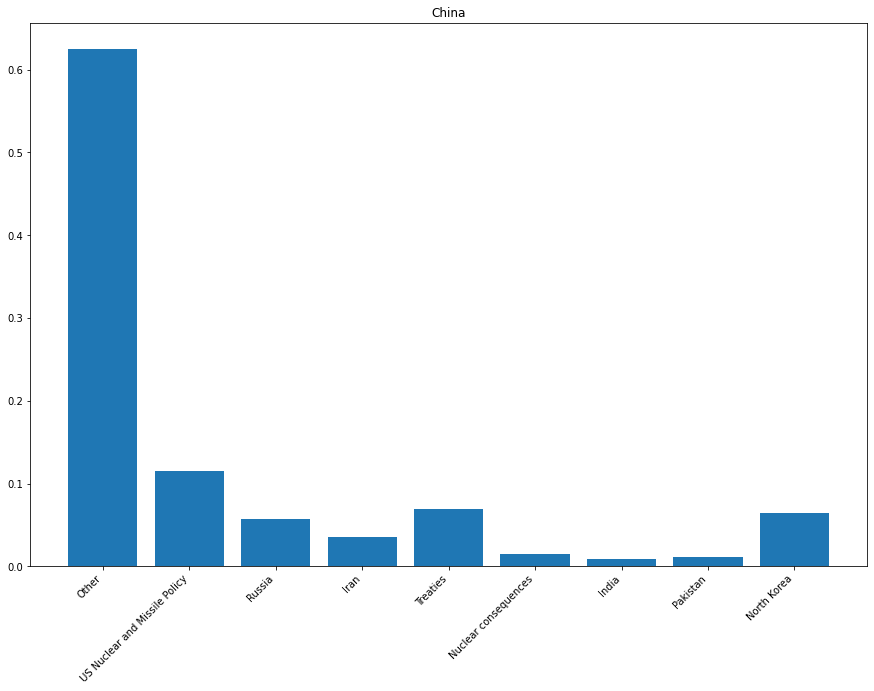

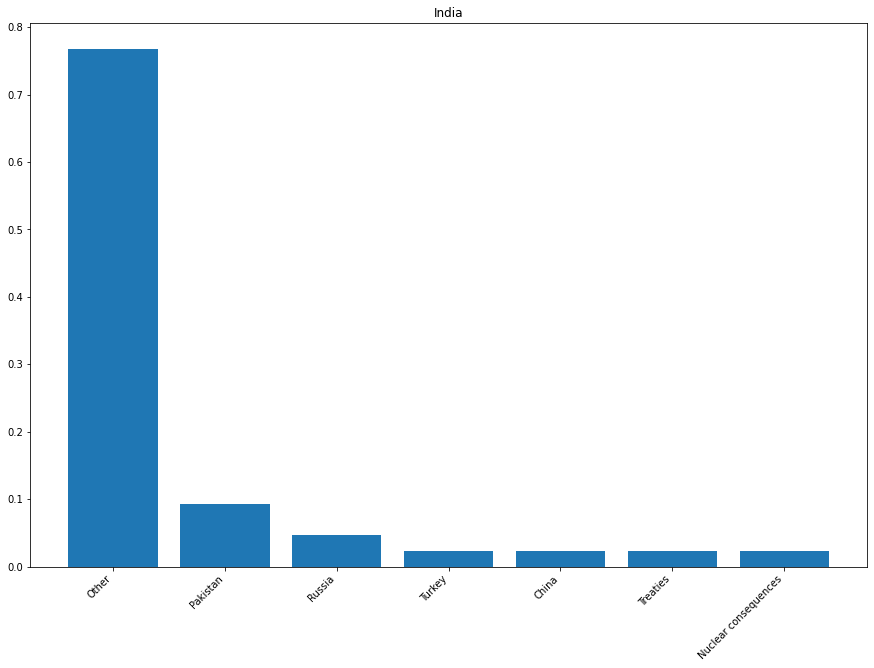

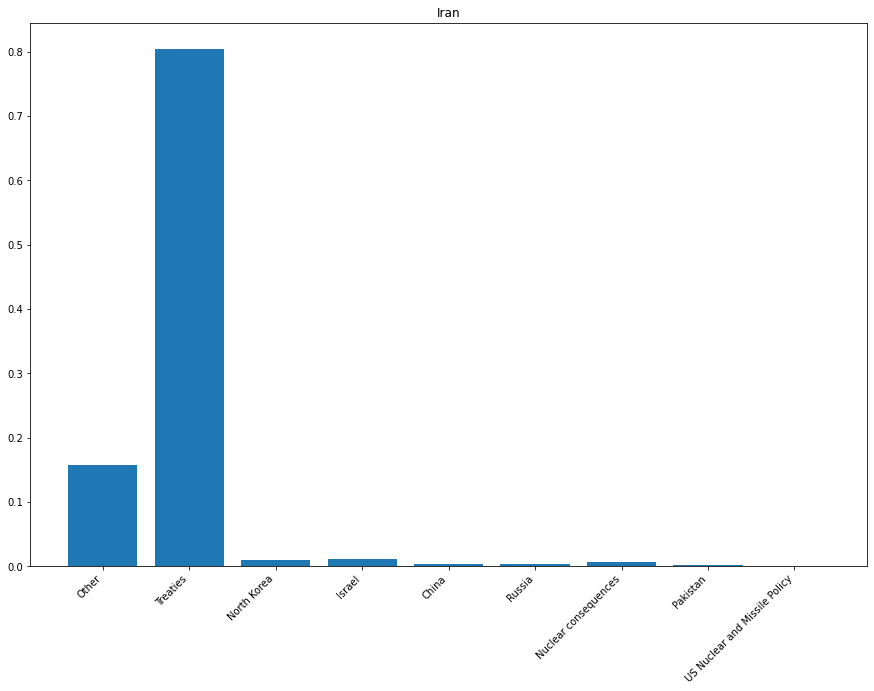

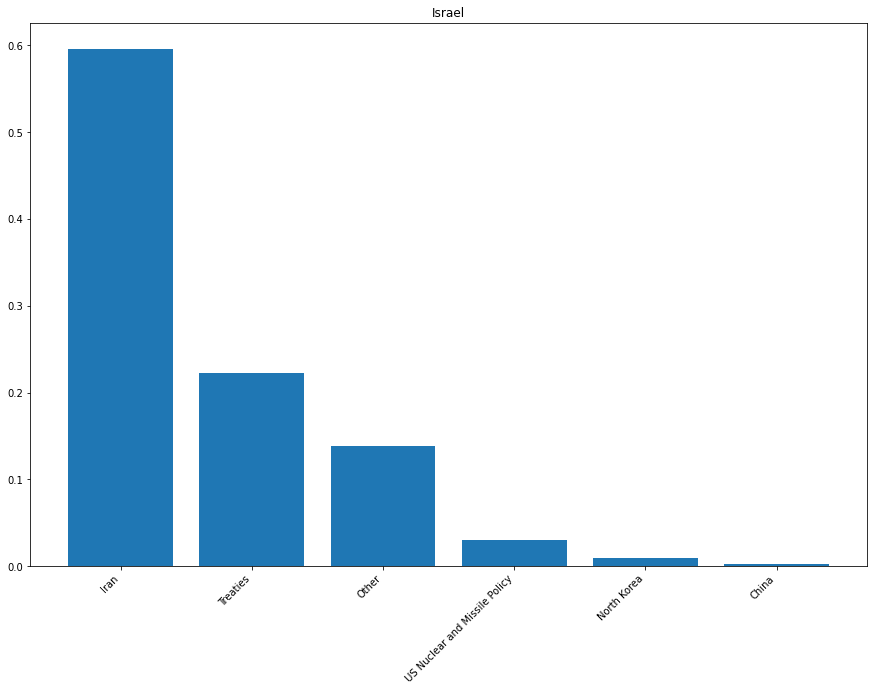

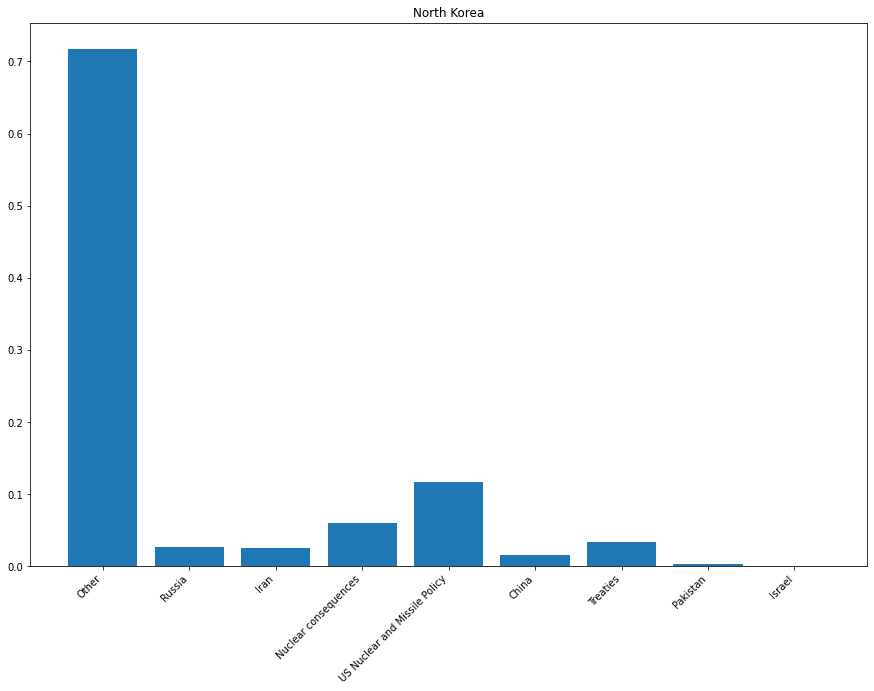

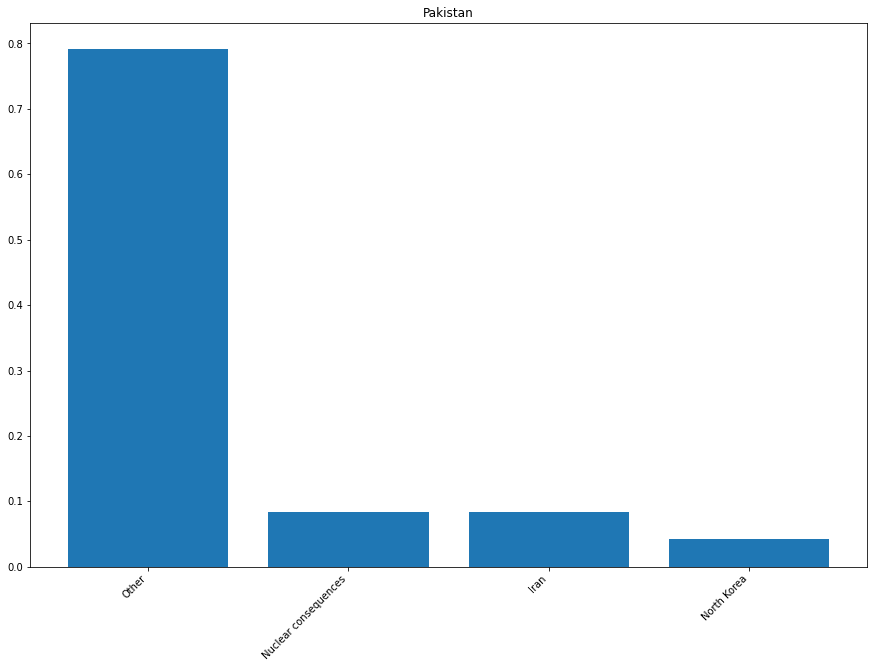

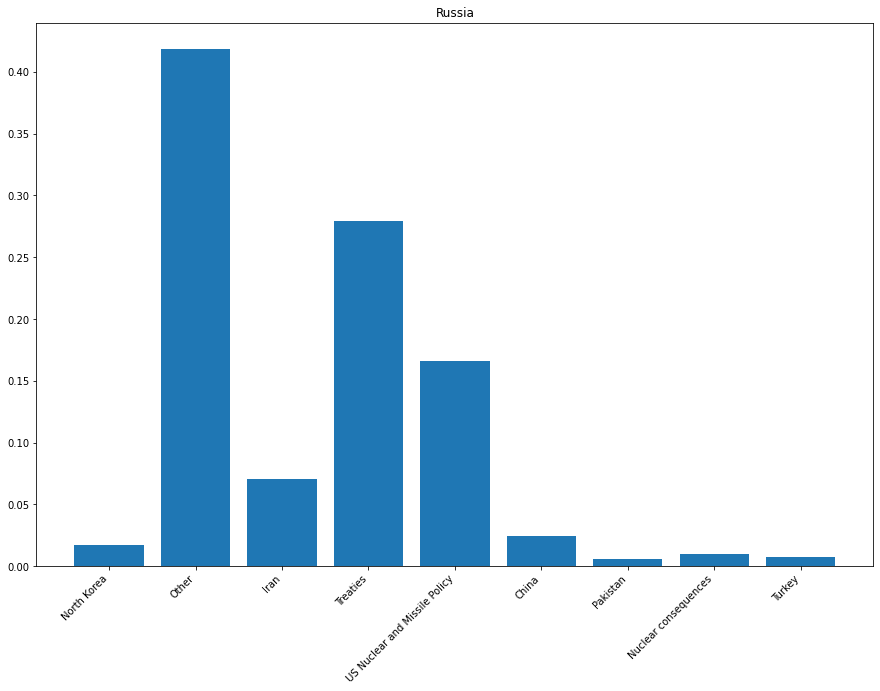

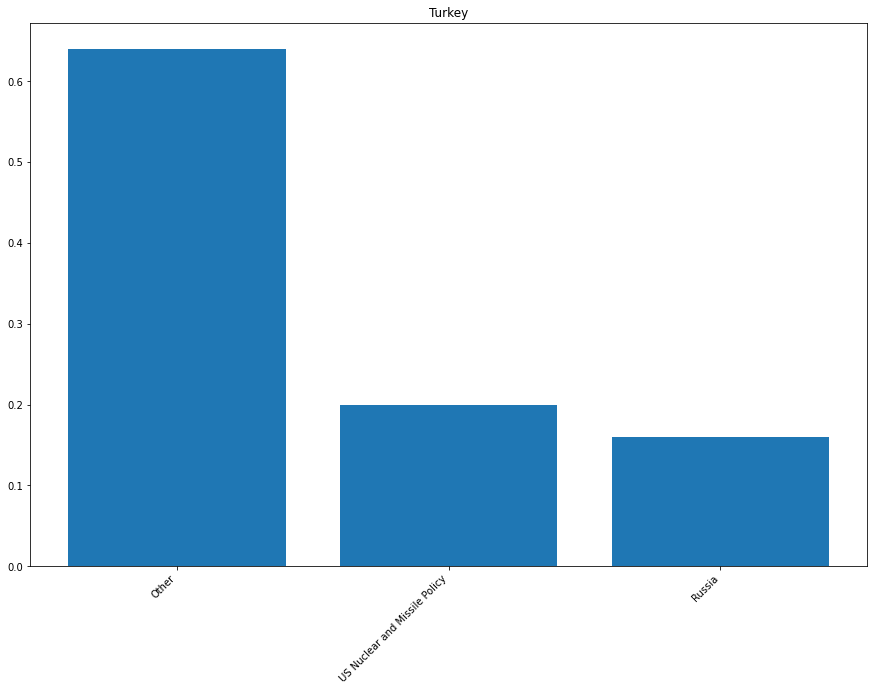

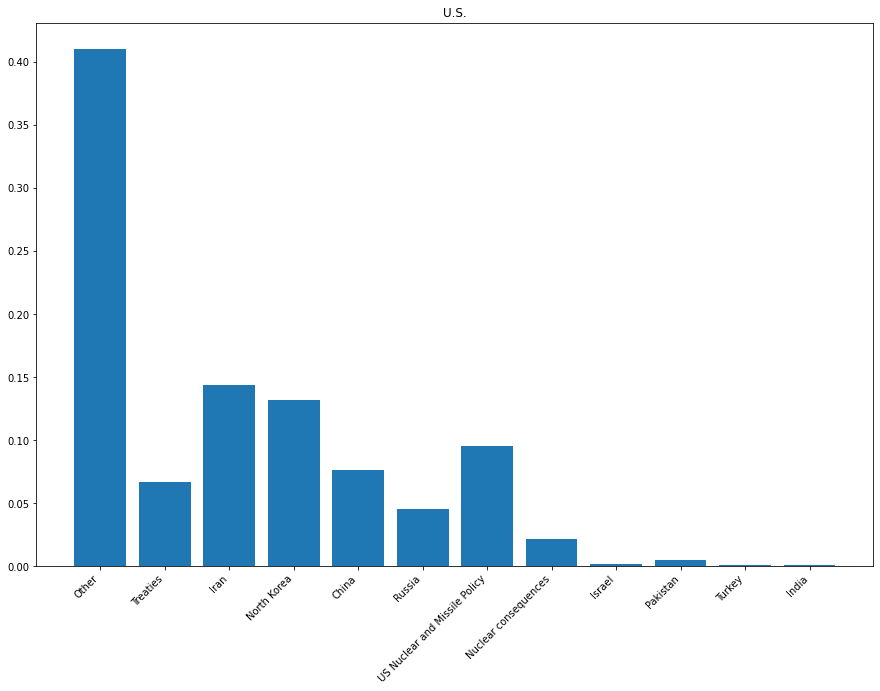

In [39]:
for index, row in misclassification_list.iterrows():
    country = index
    freq = row["message_wrong_frequencies"]
    freq_df = pd.DataFrame(freq.items())
    plt.figure(figsize=(15,10))
    plt.bar(freq_df[0].astype(str), freq_df[1].astype(np.float16))
    plt.title(country)
    plt.xticks(rotation=45, ha='right')

In [40]:
text_quote_df["is_message_country"] = text_quote_df["Messages"].apply(is_message_country)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False,False
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False,False
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False,False
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False,False
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False,False


In [41]:
df_all_country = text_quote_df[(text_quote_df["is_message_country"])]
df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]
df_country_is_message_3_all_country.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]


,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True,True
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True,True
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True,True
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True,True
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True,True


In [42]:
# proportions of values where message equal most frequent country
prop_country_equal_message_3_all_country = df_country_is_message_3_all_country.shape[0]/df_all_country.shape[0]
print(prop_country_equal_message_3_all_country)
prop_country_not_equal_message_3_all_country = df_country_is_not_message_3_all_country.shape[0]/df_all_country.shape[0]
print(prop_country_not_equal_message_3_all_country)

0.8046917034326913
0.19530829656730872


- if we are just looking at quotes labeled country, we can predict which country it is based on 3 sentences range with 80% accuracy 
- if we are looking at the whole data, we see that many values we thinl are country are instead predicted to be proliferation, missile defense, etc

## Analysis of Frequency

In [43]:
text_quote_df["country_frequencies"] = text_quote_df["surrounding_sentences_3"].apply(find_country_freq)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0..."
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.333333333333333..."
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0..."
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0..."
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False,False,"{'North Korea': 0, 'Iran': 0, 'China': 0, 'Ind..."


In [44]:
def get_max_freq(freq):
    if freq != "":
        return max(list(freq.values()))
    return 0

In [45]:
text_quote_df["max_frequency"] = text_quote_df["country_frequencies"].apply(get_max_freq)
text_quote_df.head()
# type(text_quote_df["country_frequencies"][0])

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",0.666667
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.333333333333333...",0.666667
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",1.000000
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",1.000000
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False,False,"{'North Korea': 0, 'Iran': 0, 'China': 0, 'Ind...",0.000000


In [46]:
df_country_is_message_3 = text_quote_df[text_quote_df["message_equal_country_3"]]
df_country_is_not_message_3 = text_quote_df[~text_quote_df["message_equal_country_3"]]
df_country_is_message_3.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.428571428571428...",0.428571
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000


(array([ 906.,    3.,   51.,  253.,  571., 2018.,  893.,  452.,  337.,
        1575.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

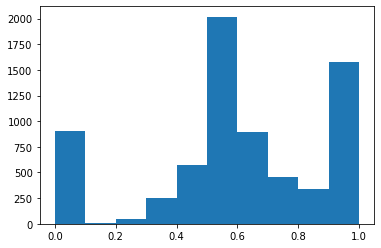

In [47]:
plt.hist(df_country_is_not_message_3["max_frequency"])

(array([  13.,    0.,   28.,  208.,  439., 2425., 1275.,  888.,  852.,
        1350.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

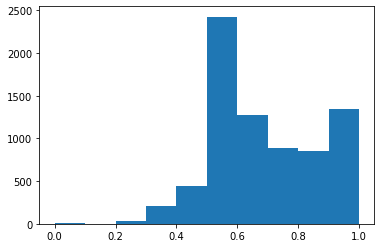

In [48]:
plt.hist(df_country_is_message_3["max_frequency"])

In [49]:
df_all_country = text_quote_df[(text_quote_df["is_message_country"])]
df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]
df_country_is_message_3_all_country.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]


,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.428571428571428...",0.428571
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000


(array([103.,   0.,  12.,  90., 253., 759., 319., 125.,  65.,  89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

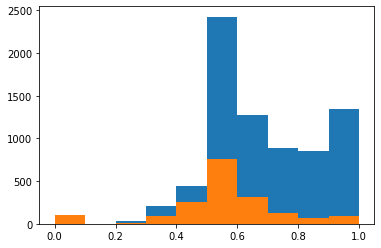

In [50]:
plt.hist(df_country_is_message_3_all_country["max_frequency"])
plt.hist(df_country_is_not_message_3_all_country["max_frequency"])

- doesn't seem to be a divisible line between max frequency vs classification result...
- what about the difference between largest and second largest frequency 

In [51]:
def get_diff_1_2_max_freq(freq):
    if freq != "":
        freq_values = list(freq.values())
        max_val = max(freq_values)
        freq_values = freq_values.remove(max_val)
        if freq_values:
            second_max = max(freq_values)
            return max_val - second_max
        return max_val
        
    return 0

In [52]:
text_quote_df["diff_1_2"] = text_quote_df["country_frequencies"].apply(get_diff_1_2_max_freq)
text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency,diff_1_2
0,Other,"The Line of Control, a highly militarized de f...",Media: Associated Press Newswires\nAuthor: By ...,[Media: Associated Press Newswires\nAuthor: By...,"[The Line of Control,, a highly militarized de...","The Line of Control,",2,[Media: Associated Press Newswires\nAuthor: By...,India,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",0.666667,0.666667
1,Other,"Iran, major powers in the agreement to keep Te...",Media: Associated Press Newswires\nAuthor: \nD...,[Media: Associated Press Newswires\nAuthor: \n...,"[Iran,, major powers in the agreement to keep ...","Iran,",0,[Media: Associated Press Newswires\nAuthor: \n...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.333333333333333...",0.666667,0.666667
2,Other,"""We are fully committed to the GBSD program of...",Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...","[""We are fully committed to the GBSD program o...","""We are fully committed to the GBSD program of...",9,[\nGBSD missiles will replace all 400 operatio...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",1.000000,1.000000
3,Other,GBSD missiles will replace all 400 operational...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[GBSD missiles will replace all 400 operationa...,GBSD missiles will replace all 400 operational...,6,[A final decision will come once that review i...,U.S.,False,False,"{'North Korea': 0.0, 'Iran': 0.0, 'China': 0.0...",1.000000,1.000000
4,Other,Acting Air Force Secretary John Roth tapped th...,Media: Defense News\nAuthor: Rachel S . Cohen\...,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",[Acting Air Force Secretary John Roth tapped t...,Acting Air Force Secretary John Roth tapped th...,2,"[Media: Defense News\nAuthor: Rachel S ., Cohe...",North Korea,False,False,"{'North Korea': 0, 'Iran': 0, 'China': 0, 'Ind...",0.000000,0.000000


In [53]:
df_country_is_message_3 = text_quote_df[text_quote_df["message_equal_country_3"]]
df_country_is_not_message_3 = text_quote_df[~text_quote_df["message_equal_country_3"]]
df_country_is_message_3.head()

,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency,diff_1_2
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000,0.750000
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000,0.750000
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000,0.500000
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.428571428571428...",0.428571,0.428571
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000,0.500000


(array([ 906.,    3.,   51.,  253.,  571., 2018.,  893.,  452.,  337.,
        1575.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

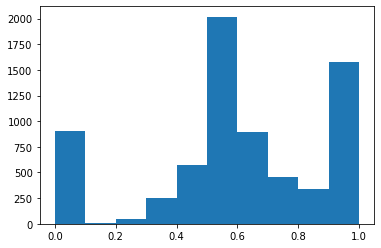

In [54]:
plt.hist(df_country_is_not_message_3["diff_1_2"])

(array([  13.,    0.,   28.,  208.,  439., 2425., 1275.,  888.,  852.,
        1350.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

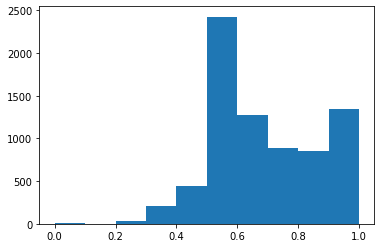

In [55]:
plt.hist(df_country_is_message_3["diff_1_2"])

In [56]:
df_all_country = text_quote_df[(text_quote_df["is_message_country"])]
df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]
df_country_is_message_3_all_country.head()

/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_message_3_all_country = df_all_country[(text_quote_df["message_equal_country_3"])]
/var/folders/x1/86vmscps1y511ryptj4pmd1w0000gn/T/ipykernel_13519/3630057736.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_is_not_message_3_all_country = df_all_country[~(text_quote_df["message_equal_country_3"])]


,Messages,QText,Content,full_sentences,quote_phrases,quote_first_phrase,quote_position,surrounding_sentences_3,most_frequent_country_3,message_equal_country_3,is_message_country,country_frequencies,max_frequency,diff_1_2
5,Iran,"""No Iran-US meeting,"" he said. ""Unnecessary.""",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""No Iran-US meeting,"" he said., ""Unnecessary.""]","""No Iran-US meeting,"" he said.",14,"[\n""These remain early days, and we don't anti...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000,0.750000
6,Iran,Iranian Foreign Minister Mohammad Javad Zarif ...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[Iranian Foreign Minister Mohammad Javad Zarif...,Iranian Foreign Minister Mohammad Javad Zarif ...,13,"[\n\nHowever, he poured cold water on there be...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.75, 'China': 0....",0.750000,0.750000
7,Iran,"""These remain early days, and we don't anticip...",Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,"[""These remain early days,, and we don't antic...","""These remain early days,",11,[\nState Department spokesperson Ned Price sai...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000,0.500000
8,Iran,He added that top issues to be discussed are s...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[He added that top issues to be discussed are ...,He added that top issues to be discussed are s...,9,"[\nPresident Biden, who served as vice preside...",Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.428571428571428...",0.428571,0.428571
9,Iran,State Department spokesperson Ned Price said F...,Media: The Hill\nAuthor: Tal Axelrod\nDate: 03...,[Media: The Hill\nAuthor: Tal Axelrod\nDate: 0...,[State Department spokesperson Ned Price said ...,State Department spokesperson Ned Price said F...,8,[Iran responded by ramping up uranium enrichme...,Iran,True,True,"{'North Korea': 0.0, 'Iran': 0.5, 'China': 0.1...",0.500000,0.500000


(array([103.,   0.,  12.,  90., 253., 759., 319., 125.,  65.,  89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

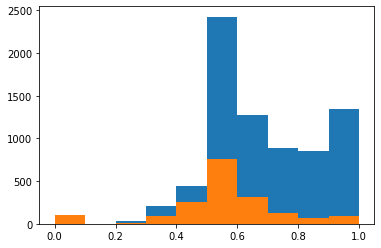

In [57]:
plt.hist(df_country_is_message_3_all_country["diff_1_2"])
plt.hist(df_country_is_not_message_3_all_country["diff_1_2"])

- also doesn't have too much of a difference and no clearly divisible line between the 2 distributions 
- cannot easily draw decision boundary for the threshold of classifying something as frequent or not 

## NEXT STEPS:
- other metrics for decision boundary for the threshold of classifying frequency?
- somehow use the misclassification frequencies (Bayesian model?)
    - can't do this anymore when everything is classified as other 
- incorporate other features as well => modeling??
- try with other search range

## Tweak Range

### Search Range: 1

In [89]:
text_quote_df["surrounding_sentences_1"] = text_quote_df.apply(lambda x: find_surrounding_text(x["full_sentences"], 
                                                                                  x["quote_position"], 1), axis = 1)
text_quote_df["most_frequent_country_1"] = text_quote_df["surrounding_sentences_1"].apply(get_most_frequent_country)
text_quote_df["message_equal_country_1"] = text_quote_df["Messages"] == text_quote_df["most_frequent_country_1"]

text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,surrounding_sentences_1,most_frequent_country_1,message_equal_country_1
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,"[\n\r\nIn Germany, Iran continued ""illegal pro...",Iran,True
3856,Iran,Banks and businesses that use the U.S. financi...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,[\n\r\nPresident Obama pledged that the deal w...,Iran,True
3860,Iran,Iran's economy grew by 0.7% since the deal was...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False


In [90]:
df_country_is_message_1 = text_quote_df[text_quote_df["message_equal_country_1"]]
df_country_is_not_message_1 = text_quote_df[~text_quote_df["message_equal_country_1"]]
df_country_is_message_1.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,surrounding_sentences_1,most_frequent_country_1,message_equal_country_1
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,"[\n\r\nIn Germany, Iran continued ""illegal pro...",Iran,True
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,[\n\r\nPresident Obama pledged that the deal w...,Iran,True
3861,Iran,"In Germany, Iran continued ""illegal proliferat...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,11,"[""Instead, Iran committed to taking steps to m...",Iran,True,Iran,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True
3862,Iran,Many Iranians remain frustrated with the pace ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,20,[And Iran has yet to produce a contract model ...,Iran,True,Iran,True,"[Inflation is 8%, down from 80% in 2013, said ...",Iran,True


In [91]:
# proportions of values where message equal most frequent country
prop_country_equal_message_1 = df_country_is_message_1.shape[0]/text_quote_df.shape[0]
print(prop_country_equal_message_1)
prop_country_not_equal_message_1 = df_country_is_not_message_1.shape[0]/text_quote_df.shape[0]
print(prop_country_not_equal_message_1)

0.5553969345012543
0.44460306549874573


### Search Range: 2

In [92]:
text_quote_df["surrounding_sentences_2"] = text_quote_df.apply(lambda x: find_surrounding_text(x["full_sentences"], 
                                                                                  x["quote_position"], 2), axis = 1)
text_quote_df["most_frequent_country_2"] = text_quote_df["surrounding_sentences_2"].apply(get_most_frequent_country)
text_quote_df["message_equal_country_2"] = text_quote_df["Messages"] == text_quote_df["most_frequent_country_2"]

text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,surrounding_sentences_1,most_frequent_country_1,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True,[And Iran has yet to produce a contract model ...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,"[\n\r\nIn Germany, Iran continued ""illegal pro...",Iran,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True
3856,Iran,Banks and businesses that use the U.S. financi...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False,[],None,False
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,[\n\r\nPresident Obama pledged that the deal w...,Iran,True,[And it accepted international monitoring to e...,Iran,True
3860,Iran,Iran's economy grew by 0.7% since the deal was...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False,[],None,False


In [93]:
df_country_is_message_2 = text_quote_df[text_quote_df["message_equal_country_2"]]
df_country_is_not_message_2 = text_quote_df[~text_quote_df["message_equal_country_2"]]
df_country_is_message_2.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,surrounding_sentences_1,most_frequent_country_1,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True,[And Iran has yet to produce a contract model ...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,"[\n\r\nIn Germany, Iran continued ""illegal pro...",Iran,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,[\n\r\nPresident Obama pledged that the deal w...,Iran,True,[And it accepted international monitoring to e...,Iran,True
3861,Iran,"In Germany, Iran continued ""illegal proliferat...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,11,"[""Instead, Iran committed to taking steps to m...",Iran,True,Iran,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True,[\n\r\nSome of Iran's illicit activities invol...,Iran,True
3862,Iran,Many Iranians remain frustrated with the pace ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,20,[And Iran has yet to produce a contract model ...,Iran,True,Iran,True,"[Inflation is 8%, down from 80% in 2013, said ...",Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True


In [94]:
# proportions of values where message equal most frequent country
prop_country_equal_message_2 = df_country_is_message_2.shape[0]/text_quote_df.shape[0]
print(prop_country_equal_message_2)
prop_country_not_equal_message_2 = df_country_is_not_message_2.shape[0]/text_quote_df.shape[0]
print(prop_country_not_equal_message_2)

0.6071661467420998
0.3928338532579002


### Search Range: 4

In [95]:
text_quote_df["surrounding_sentences_4"] = text_quote_df.apply(lambda x: find_surrounding_text(x["full_sentences"], 
                                                                                  x["quote_position"], 4), axis = 1)
text_quote_df["most_frequent_country_4"] = text_quote_df["surrounding_sentences_4"].apply(get_most_frequent_country)
text_quote_df["message_equal_country_4"] = text_quote_df["Messages"] == text_quote_df["most_frequent_country_4"]

text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,surrounding_sentences_1,most_frequent_country_1,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2,surrounding_sentences_4,most_frequent_country_4,message_equal_country_4
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True,[And Iran has yet to produce a contract model ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,"[\n\r\nIn Germany, Iran continued ""illegal pro...",Iran,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True,"[""Instead, Iran committed to taking steps to m...",Iran,True
3856,Iran,Banks and businesses that use the U.S. financi...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False,[],None,False,[],None,False
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,[\n\r\nPresident Obama pledged that the deal w...,Iran,True,[And it accepted international monitoring to e...,Iran,True,"[\r\n\r\nUnder the deal, Iran reduced its stoc...",Iran,True
3860,Iran,Iran's economy grew by 0.7% since the deal was...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,[],None,False,[],None,False,[],None,False


In [97]:
df_country_is_message_4 = text_quote_df[text_quote_df["message_equal_country_4"]]
df_country_is_not_message_4 = text_quote_df[~text_quote_df["message_equal_country_4"]]
df_country_is_message_4.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,...,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2,surrounding_sentences_4,most_frequent_country_4,message_equal_country_4,surrounding_sentences_5,most_frequent_country_5,message_equal_country_5
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,...,True,[And Iran has yet to produce a contract model ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True,[\n\r\nThe increased supply helped produce a g...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,...,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True,"[""Instead, Iran committed to taking steps to m...",Iran,True,"[\n\r\nWithout it, ""we might be faced with Ira...",Iran,True
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,...,True,[And it accepted international monitoring to e...,Iran,True,"[\r\n\r\nUnder the deal, Iran reduced its stoc...",Iran,True,"[All Rights Reserved., \r\n\r\nUnder the deal,...",Iran,True
3861,Iran,"In Germany, Iran continued ""illegal proliferat...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,11,"[""Instead, Iran committed to taking steps to m...",Iran,True,Iran,True,...,True,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,"[\n\r\nWithout it, ""we might be faced with Ira...",Iran,True,"[\n\r\nWendy Sherman, the State Department's c...",Iran,True
3862,Iran,Many Iranians remain frustrated with the pace ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,20,[And Iran has yet to produce a contract model ...,Iran,True,Iran,True,...,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True


In [99]:
# proportions of values where message equal most frequent country
prop_country_equal_message_4 = df_country_is_message_4.shape[0]/text_quote_df.shape[0]
print(prop_country_equal_message_4)
prop_country_not_equal_message_4 = df_country_is_not_message_4.shape[0]/text_quote_df.shape[0]
print(prop_country_not_equal_message_4)

0.631564414835181
0.368435585164819


### Search Range: 5

In [96]:
text_quote_df["surrounding_sentences_5"] = text_quote_df.apply(lambda x: find_surrounding_text(x["full_sentences"], 
                                                                                  x["quote_position"], 5), axis = 1)
text_quote_df["most_frequent_country_5"] = text_quote_df["surrounding_sentences_5"].apply(get_most_frequent_country)
text_quote_df["message_equal_country_5"] = text_quote_df["Messages"] == text_quote_df["most_frequent_country_5"]

text_quote_df.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,...,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2,surrounding_sentences_4,most_frequent_country_4,message_equal_country_4,surrounding_sentences_5,most_frequent_country_5,message_equal_country_5
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,...,True,[And Iran has yet to produce a contract model ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True,[\n\r\nThe increased supply helped produce a g...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,...,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True,"[""Instead, Iran committed to taking steps to m...",Iran,True,"[\n\r\nWithout it, ""we might be faced with Ira...",Iran,True
3856,Iran,Banks and businesses that use the U.S. financi...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,...,False,[],None,False,[],None,False,[],None,False
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,...,True,[And it accepted international monitoring to e...,Iran,True,"[\r\n\r\nUnder the deal, Iran reduced its stoc...",Iran,True,"[All Rights Reserved., \r\n\r\nUnder the deal,...",Iran,True
3860,Iran,Iran's economy grew by 0.7% since the deal was...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,-1,[],None,False,None,False,...,False,[],None,False,[],None,False,[],None,False


In [98]:
df_country_is_message_5 = text_quote_df[text_quote_df["message_equal_country_5"]]
df_country_is_not_message_5 = text_quote_df[~text_quote_df["message_equal_country_5"]]
df_country_is_message_5.head()

,Messages,QText,Content,full_sentences,quote_position,surrounding_sentences_3,most_frequent_country,message_equal_country,most_frequent_country_3,message_equal_country_3,...,message_equal_country_1,surrounding_sentences_2,most_frequent_country_2,message_equal_country_2,surrounding_sentences_4,most_frequent_country_4,message_equal_country_4,surrounding_sentences_5,most_frequent_country_5,message_equal_country_5
3854,Iran,The benefits mean Iranians were spared an econ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,19,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,Iran,True,...,True,[And Iran has yet to produce a contract model ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True,[\n\r\nThe increased supply helped produce a g...,Iran,True
3855,Iran,"the U.S. has ""no indication"" those efforts suc...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,12,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,Iran,True,...,True,[\n\r\nThe U.N. Secretary-General Ban Ki Moon ...,Iran,True,"[""Instead, Iran committed to taking steps to m...",Iran,True,"[\n\r\nWithout it, ""we might be faced with Ira...",Iran,True
3857,Iran,the deal made the world safer,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,6,[Iran destroyed the reactor core in its heavy ...,Iran,True,Iran,True,...,True,[And it accepted international monitoring to e...,Iran,True,"[\r\n\r\nUnder the deal, Iran reduced its stoc...",Iran,True,"[All Rights Reserved., \r\n\r\nUnder the deal,...",Iran,True
3861,Iran,"In Germany, Iran continued ""illegal proliferat...","Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,11,"[""Instead, Iran committed to taking steps to m...",Iran,True,Iran,True,...,True,[\n\r\nSome of Iran's illicit activities invol...,Iran,True,"[\n\r\nWithout it, ""we might be faced with Ira...",Iran,True,"[\n\r\nWendy Sherman, the State Department's c...",Iran,True
3862,Iran,Many Iranians remain frustrated with the pace ...,"Valley & State\r\nA year after nuclear deal,...",[Valley & State\r\nA year after nuclear deal...,20,[And Iran has yet to produce a contract model ...,Iran,True,Iran,True,...,True,"[\n\r\nEconomic boost,\r\n\r\nbut deals stall\...",Iran,True,[\n\r\nBanks and businesses that use the U.S. ...,Iran,True,[\n\r\nDozens of other deals to develop Iran's...,Iran,True


In [100]:
# proportions of values where message equal most frequent country
prop_country_equal_message_5 = df_country_is_message_5.shape[0]/text_quote_df.shape[0]
print(prop_country_equal_message_5)
prop_country_not_equal_message_5 = df_country_is_not_message_5.shape[0]/text_quote_df.shape[0]
print(prop_country_not_equal_message_5)

0.6354946920695348
0.3645053079304652


### Thoughts:
- looking at 4 sentences before and 4 sentences seem to yield the best input given the current dataset 
- search range of 1 is fastest => makes sense
- search range of 5 => accuracy begins to drop actually
- search range of 2 and 3 has accruacy very close to 4 => maybe use that instead for time considerations 

<!-- ## NEXT STEPS:
- look at all the ways things can go wrong 
    - the quote cannot be found in the sentences => probably something that's missing since looking at exact search now
    - look at what the most frequent countries are and why frequency is not the best classifier
    - look at the above bullet point for each search range
- look into ways to use fuzzywuzzy (current problem is that it's too slow within the loop
    - or all other text comparision libraries
- rerun this without filtering the by country messages => may be slow
- look into paragraph by paragraph analysis instead of sentence by sentence 
- look into Daniel's code -->